# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score
    
    i. Create a new dataset with two variables of your choice
    
    ii. Determine optimal number of clusters
    
    iii. Apply K Means
    
    iv. Visualizing and Labeling All the Clusters
    
    
- Clustering based on Annual Income and Spending Score
    
    i. Create a new dataset with two variables of your choice
    
    ii. Determine optimal number of clusters
    
    iii. Apply K Means
    
    iv. Visualizing and Labeling All the Clusters
    
    
- Hierarchical Clustering

    i. Determine optimal number of clusters using Dendogram
    
    ii. Apply Agglomerative Clustering
    
    iii. Visualizing and Labeling All the Clusters 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df2 = df.copy()
df2.Gender = df2.Gender.map({'Female':0, 'Male':1})

In [5]:
df2.drop(columns='CustomerID', inplace=True)
df2.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


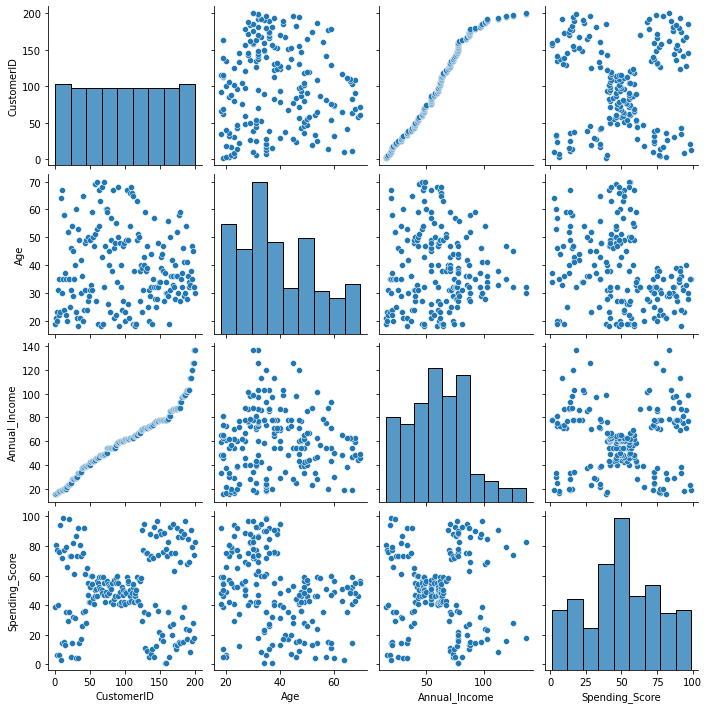

In [8]:
sns.pairplot(df);

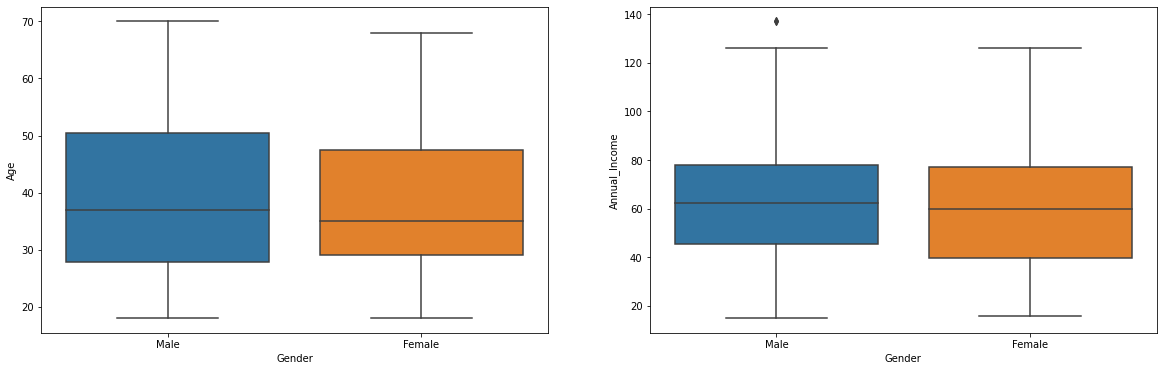

In [9]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(x='Gender', y='Age', data=df)

plt.subplot(122)
sns.boxplot(x='Gender', y='Annual_Income', data=df);

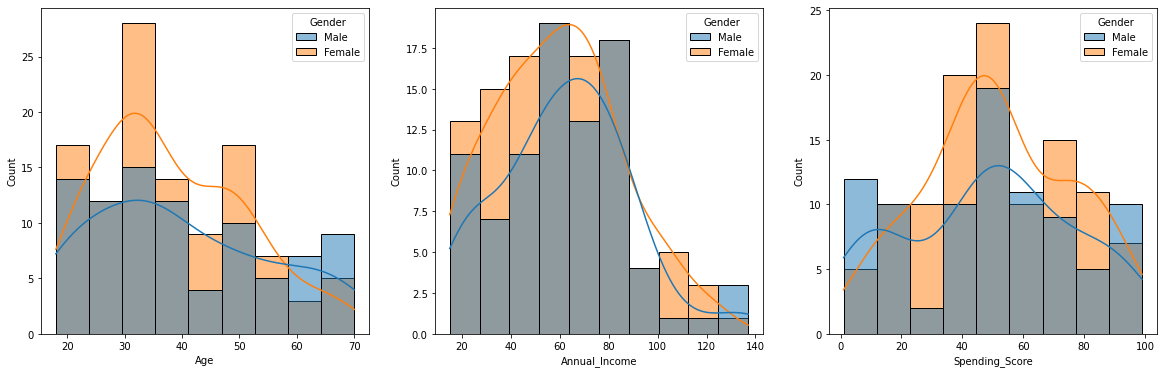

In [10]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.histplot(x='Age', hue='Gender', data=df, kde=True)

plt.subplot(132)
sns.histplot(x='Annual_Income', hue='Gender', data=df, kde=True)

plt.subplot(133)
sns.histplot(x='Spending_Score', hue='Gender', data=df, kde=True);

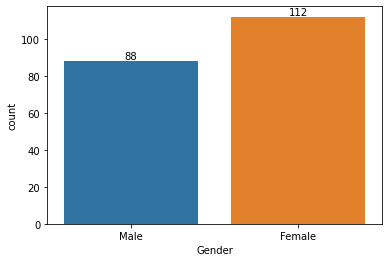

In [11]:
plt.figure(figsize = (6,4))
ax = sns.countplot(df.Gender)
for i in ax.containers:
    ax.bar_label(i);

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [12]:
df.head(1)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39


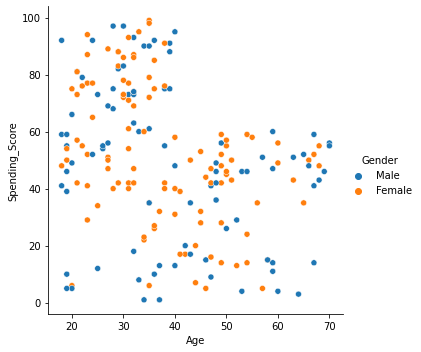

In [13]:
sns.relplot(x='Age', y='Spending_Score', hue='Gender', data=df);

In [14]:
df_age = df[['Age', 'Spending_Score']]
df_age.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [15]:
scaler = MinMaxScaler()
df_age_scaled = scaler.fit_transform(df_age)

In [16]:
df_age_scaled = pd.DataFrame(df_age_scaled, columns=df_age.columns)
df_age_scaled

,Age,Spending_Score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959
5,0.076923,0.765306
6,0.326923,0.051020
7,0.096154,0.948980
8,0.884615,0.020408
9,0.230769,0.724490


In [17]:
from sklearn.cluster import KMeans
K_means_age = KMeans(n_clusters=3, random_state=42)

In [18]:
K_means_age.fit_predict(df_age_scaled)

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [19]:
df_age_scaled['Clusters'] = K_means_age.labels_
df_age_scaled

,Age,Spending_Score,Clusters
0,0.019231,0.387755,2
1,0.057692,0.816327,0
2,0.038462,0.051020,2
3,0.096154,0.775510,0
4,0.250000,0.397959,2
5,0.076923,0.765306,0
6,0.326923,0.051020,2
7,0.096154,0.948980,0
8,0.884615,0.020408,1
9,0.230769,0.724490,0


#### *ii. Determine optimal number of clusters*

#### Hopkins test

In [20]:
from pyclustertend import hopkins

In [21]:
df_age_scaled = df_age_scaled.iloc[:,:-1]

In [22]:
df_age_scaled.shape

(200, 2)

In [23]:
hopkins(df_age_scaled, df_age_scaled.shape[0])

0.3065090409925403

#### Elbow Metod

In [24]:
ssd = []

K = range(2,10)

for k in K:
    model_age = KMeans(n_clusters=k, random_state=42)
    model_age.fit(df_age_scaled)
    ssd.append(model_age.inertia_)
    

Text(0.5, 1.0, 'elbow method')

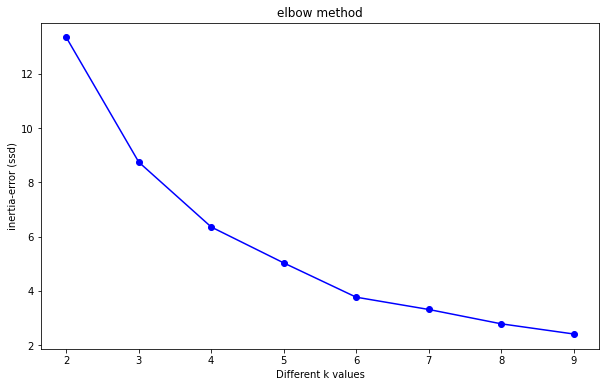

In [25]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 

In [26]:
ssd

[13.337690580804237,
 8.742042168276534,
 6.3502463191224745,
 5.026143351352524,
 3.7627968093270683,
 3.310446181738138,
 2.781552120356595,
 2.4066362812228745]

In [27]:
pd.Series(ssd).diff()

0         NaN
1   -4.595648
2   -2.391796
3   -1.324103
4   -1.263347
5   -0.452351
6   -0.528894
7   -0.374916
dtype: float64

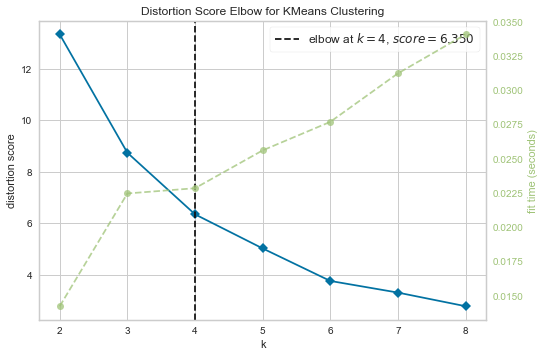

In [28]:
from yellowbrick.cluster import KElbowVisualizer

model_age_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_age_, k=(2,9))

visualizer.fit(df_age_scaled)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

In [29]:
K_means_age.labels_

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_score(df_age_scaled, K_means_age.labels_)

0.44058221683010546

In [32]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_age_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_age, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.44500330004380645
For n_clusters=3, the silhouette score is 0.40726715397622604
For n_clusters=4, the silhouette score is 0.4733474038121991
For n_clusters=5, the silhouette score is 0.4461750225971865
For n_clusters=6, the silhouette score is 0.4367460982234325
For n_clusters=7, the silhouette score is 0.33313295534061205
For n_clusters=8, the silhouette score is 0.3809916944008307


#### *iii. Apply K Means*

In [33]:
from sklearn.cluster import KMeans
final_model_age = KMeans(n_clusters=5, random_state=42)

In [34]:
final_model_age.fit_predict(df_age_scaled)

array([0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3,
       1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 4, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 2, 4, 4, 4, 2, 0, 4, 2, 0, 2, 4, 2, 0,
       4, 2, 0, 0, 2, 4, 2, 2, 2, 0, 4, 4, 0, 4, 2, 4, 2, 4, 0, 4, 4, 0,
       3, 4, 2, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 2, 0, 4, 0, 2, 4, 2, 2,
       2, 0, 4, 0, 0, 0, 2, 4, 4, 4, 0, 4, 4, 3, 0, 3, 4, 3, 1, 3, 1, 3,
       0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 4, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [35]:
hopkins(df_age_scaled, df_age_scaled.shape[0])

0.3196359594554431

In [36]:
df_age["predicted_clusters"] = final_model_age.labels_
df_age_scaled["predicted_clusters"] = final_model_age.labels_

In [37]:
df_age.head(3)

,Age,Spending_Score,predicted_clusters
0,19,39,0
1,21,81,3
2,20,6,0


In [38]:
df_age_scaled.head(3)

,Age,Spending_Score,predicted_clusters
0,0.019231,0.387755,0
1,0.057692,0.816327,3
2,0.038462,0.051020,0


#### *iv. Visualizing and Labeling All the Clusters*

In [39]:
centers_age = final_model_age.cluster_centers_

In [40]:
centers_age

array([[0.11791498, 0.41675618],
       [0.52767355, 0.1483325 ],
       [0.9029304 , 0.48104956],
       [0.23347356, 0.80771684],
       [0.56036325, 0.46371882]])

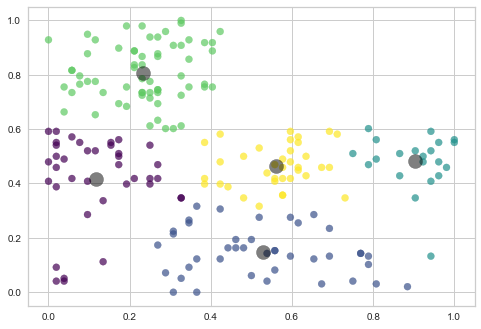

In [41]:
plt.scatter(x=df_age_scaled["Age"], y=df_age_scaled["Spending_Score"], c = df_age_scaled.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers_age[:, 0], centers_age[:, 1], c='black', s=200, alpha=0.5);

In [42]:
clus_pred_age = df_age.groupby("predicted_clusters").mean().sort_values(by='Spending_Score', ascending=False)
clus_pred_age

,Age,Spending_Score
predicted_clusters,,
3,30.140625,80.156250
2,64.952381,48.142857
4,47.138889,46.444444
0,24.131579,41.842105
1,45.439024,15.536585


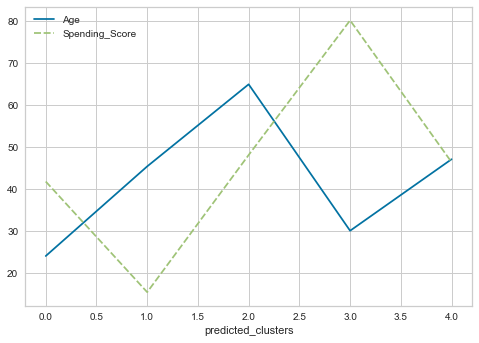

In [43]:
sns.lineplot(data = clus_pred_age);

In [44]:
df_age.predicted_clusters = df_age.predicted_clusters.map({3:'High_Spender', 2:'High_Med_Spender', 4:'Med_Spender',
                                        0:'Med_Low_Spender',1:'Low_Spender'})
df_age

,Age,Spending_Score,predicted_clusters
0,19,39,Med_Low_Spender
1,21,81,High_Spender
2,20,6,Med_Low_Spender
3,23,77,High_Spender
4,31,40,Med_Low_Spender
5,22,76,High_Spender
6,35,6,Low_Spender
7,23,94,High_Spender
8,64,3,Low_Spender
9,30,72,High_Spender


In [45]:
df_age.groupby("predicted_clusters").mean().sort_values(by='Spending_Score', ascending=False)

,Age,Spending_Score
predicted_clusters,,
High_Spender,30.140625,80.156250
High_Med_Spender,64.952381,48.142857
Med_Spender,47.138889,46.444444
Med_Low_Spender,24.131579,41.842105
Low_Spender,45.439024,15.536585


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [46]:
df.head(1)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39


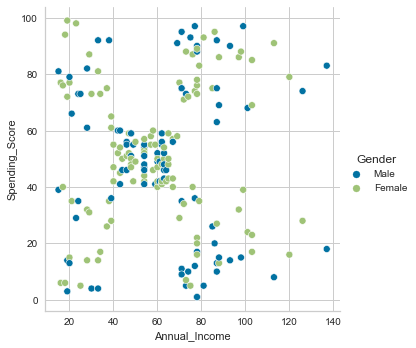

In [47]:
sns.relplot(x='Annual_Income', y='Spending_Score', hue='Gender', data=df);

In [48]:
df_ann = df[['Annual_Income', 'Spending_Score']]
df_ann.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [49]:
scaler = MinMaxScaler()
df_ann_scaled = scaler.fit_transform(df_ann)

In [50]:
df_ann_scaled = pd.DataFrame(df_ann_scaled, columns=df_ann.columns)
df_ann_scaled.head()

,Annual_Income,Spending_Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [51]:
from sklearn.cluster import KMeans
K_Means_ann = KMeans(n_clusters=4, random_state=42)

In [52]:
K_Means_ann.fit_predict(df_ann_scaled)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [53]:
df_ann['Clusters'] = K_Means_ann.labels_
df_ann.head()

,Annual_Income,Spending_Score,Clusters
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


In [54]:
df_ann_scaled['Clusters'] = K_Means_ann.labels_
df_ann_scaled.head()

,Annual_Income,Spending_Score,Clusters
0,0.000000,0.387755,3
1,0.000000,0.816327,0
2,0.008197,0.051020,3
3,0.008197,0.775510,0
4,0.016393,0.397959,3


#### *ii. Determine optimal number of clusters*

#### Hopkins Test

In [55]:
from pyclustertend import hopkins

In [56]:
df_ann = df_ann.iloc[:,:-1]
df_ann.shape

(200, 2)

In [57]:
df_ann_scaled = df_ann_scaled.iloc[:,:-1]
df_ann_scaled.shape

(200, 2)

In [58]:
hopkins(df_ann_scaled, df_ann_scaled.shape[0])

0.3127525697777203

#### Elbow Method

In [59]:
ssd=[]

K=range(2,10)

for k in K:
    model_ann = KMeans(n_clusters=k, random_state=42)
    model_ann.fit(df_ann_scaled)
    ssd.append(model_ann.inertia_)

Text(0.5, 1.0, 'elbow method')

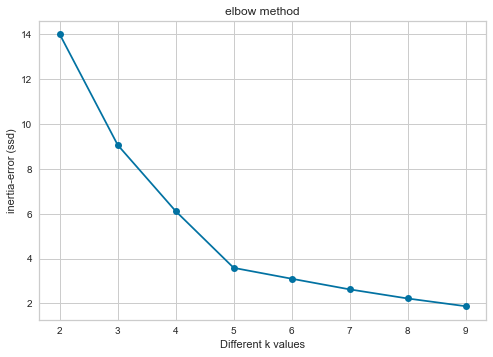

In [60]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 

In [61]:
ssd

[13.993505283127979,
 9.058985215159455,
 6.110312266413655,
 3.583117905952559,
 3.0983851418825834,
 2.624103948396722,
 2.218057312083073,
 1.8734346678670708]

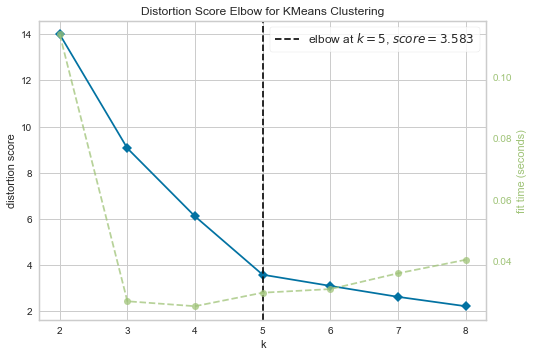

In [62]:
from yellowbrick.cluster import KElbowVisualizer

model_ann_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_ann_, k=(2,9))

visualizer.fit(df_ann_scaled)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

In [63]:
K_Means_ann.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

#### Silhouette

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(df_ann_scaled, K_Means_ann.labels_)

0.49620078745146784

In [66]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_ann_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_ann, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2918426367691145
For n_clusters=3, the silhouette score is 0.4453863095716561
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5290181936796062
For n_clusters=8, the silhouette score is 0.4536474105132585


#### *iii. Apply K Means*

In [67]:
from sklearn.cluster import KMeans
final_model_ann = KMeans(n_clusters=5, random_state=42)

In [68]:
final_model_ann.fit_predict(df_ann_scaled)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [69]:
hopkins(df_ann_scaled, df_ann_scaled.shape[0])

0.3017787690650817

In [70]:
df_ann["predicted_clusters"] = final_model_ann.labels_
df_ann_scaled["predicted_clusters"] = final_model_ann.labels_

In [71]:
df_ann.head(3)

,Annual_Income,Spending_Score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2


In [74]:
df_ann_scaled.head(3)

,Annual_Income,Spending_Score,predicted_clusters
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2


#### *iv. Visualizing and Labeling All the Clusters*

In [75]:
centers_ann = final_model_ann.cluster_centers_

In [76]:
centers_ann

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

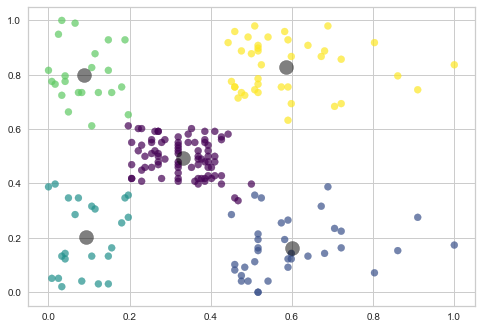

In [78]:
plt.scatter(x=df_ann_scaled["Annual_Income"], y=df_ann_scaled["Spending_Score"], c = df_ann_scaled.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers_ann[:, 0], centers_ann[:, 1], c='black', s=200, alpha=0.5);

In [80]:
clus_pred_ann = df_ann.groupby("predicted_clusters").mean().sort_values(by='Spending_Score', ascending=False)
clus_pred_ann

,Annual_Income,Spending_Score
predicted_clusters,,
4,86.538462,82.128205
3,25.727273,79.363636
0,55.296296,49.518519
2,26.304348,20.913043
1,88.200000,17.114286


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [129]:
df_den_age = df[['Age', 'Spending_Score']]
df_den_age.head(3)

,Age,Spending_Score
0,19,39
1,21,81
2,20,6


In [130]:
scaler = MinMaxScaler()
df_den_age_scaled = scaler.fit_transform(df_den_age)

In [131]:
X1 = pd.DataFrame(df_den_age_scaled, columns=df_den_age.columns)
X1.head()

,Age,Spending_Score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


#### Denogram

In [132]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [133]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

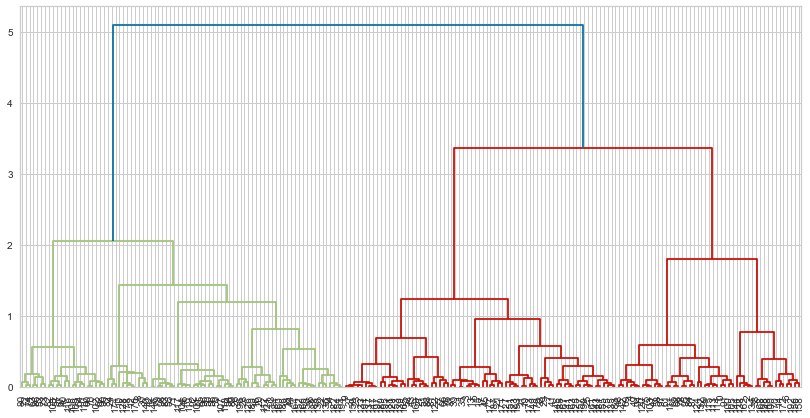

In [134]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

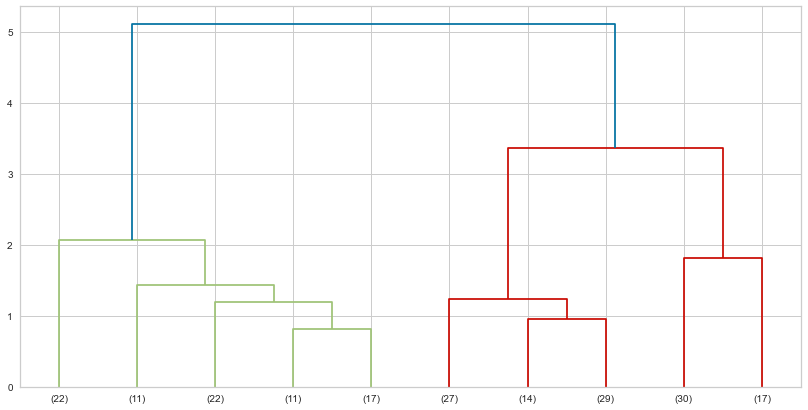

In [135]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           leaf_font_size = 10);

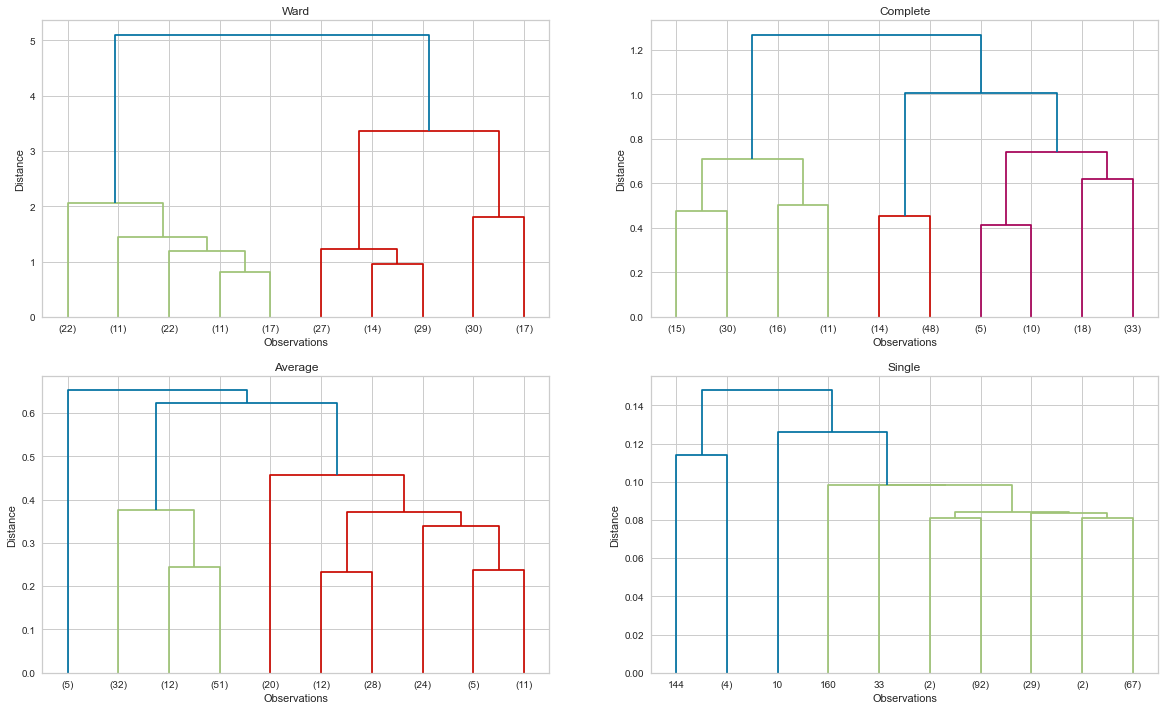

In [136]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

#### Hierarchical Clustering (Agglomerative)

In [137]:
from sklearn.cluster import AgglomerativeClustering

In [138]:
from sklearn.metrics import silhouette_score

In [139]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_den_age_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.41699937625242867
Silhouette Score for 3 clusters: 0.417124576652748
Silhouette Score for 4 clusters: 0.3898644314748176
Silhouette Score for 5 clusters: 0.37668241046330797
Silhouette Score for 6 clusters: 0.39920932010291066
Silhouette Score for 7 clusters: 0.3589298217276204
Silhouette Score for 8 clusters: 0.3611306861915168
Silhouette Score for 9 clusters: 0.3657953810746083


In [140]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X1)

In [141]:
X1.head()

,Age,Spending_Score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


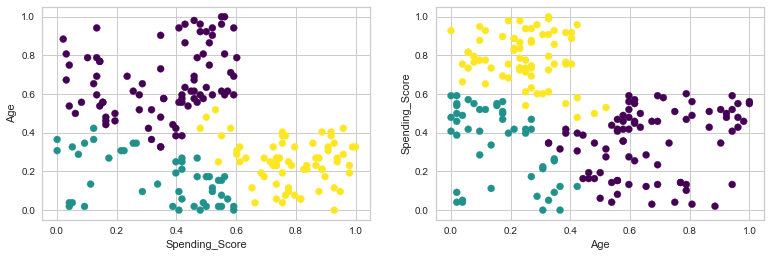

In [142]:
plt.figure(figsize = (20,18))
plot_number = 1
for i in X1:
    for j in X1:
        if j!=i:
            plt.subplot(4,3,plot_number)
            plt.scatter(X1[j], X1[i], c = clusters, cmap = "viridis")
            plt.xlabel(j)
            plt.ylabel(i)
            plot_number += 1

In [143]:
X1["cluster"] = clusters
X1.head()

,Age,Spending_Score,cluster
0,0.019231,0.387755,1
1,0.057692,0.816327,2
2,0.038462,0.051020,1
3,0.096154,0.775510,2
4,0.250000,0.397959,1


In [144]:
df_den_age["cluster"] = clusters
df_den_age.head()

,Age,Spending_Score,cluster
0,19,39,1
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,1


In [145]:
df_den_age.groupby("cluster").mean()

,Age,Spending_Score
cluster,,
0,52.578313,35.638554
1,26.382979,34.765957
2,30.942857,77.828571


In [146]:
clus_pred = X1.groupby("cluster").mean()
clus_pred

,Age,Spending_Score
cluster,,
0,0.664968,0.353455
1,0.161211,0.344551
2,0.248901,0.783965


#### Hopkins test

In [147]:
hopkins(X1, X1.shape[0])

0.07211425232274604

## Clustering based on Annual Income and Spending Score- x2

In [108]:
df_den_ann = df[['Annual_Income', 'Spending_Score']]
df_den_ann.head(3)

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6


In [109]:
scaler = MinMaxScaler()
df_den_ann_scaled = scaler.fit_transform(df_den_ann)

In [110]:
X2 = pd.DataFrame(df_den_ann_scaled, columns=df_den_ann.columns)
X2.head()

,Annual_Income,Spending_Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


#### Denogram

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [111]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

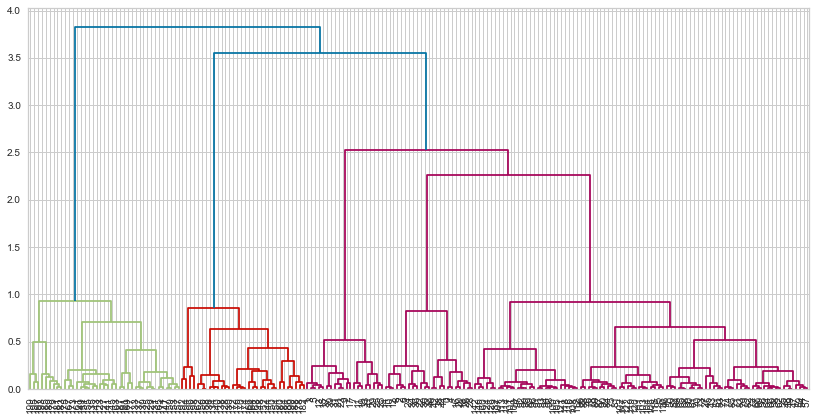

In [113]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

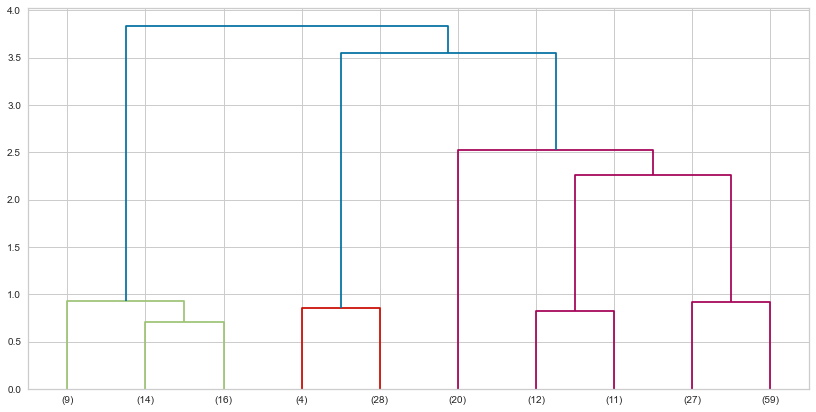

In [114]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           leaf_font_size = 10);

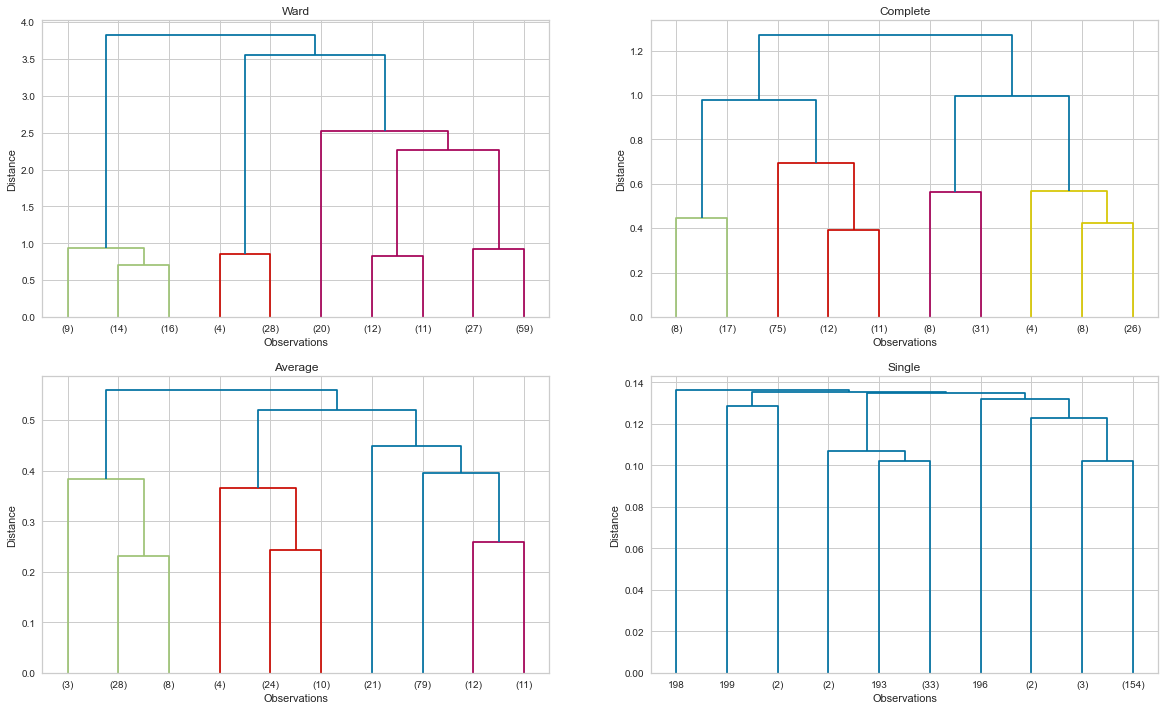

In [115]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

#### Hierarchical Clustering (Agglomerative)

In [117]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [118]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_den_ann_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.39090074716611595
Silhouette Score for 3 clusters: 0.44796167261691394
Silhouette Score for 4 clusters: 0.4976418539903167
Silhouette Score for 5 clusters: 0.5582698727196419
Silhouette Score for 6 clusters: 0.5296670434232814
Silhouette Score for 7 clusters: 0.409308025869031
Silhouette Score for 8 clusters: 0.41055127971395405
Silhouette Score for 9 clusters: 0.4177210331066167


In [119]:
model = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X2)

In [121]:
X2.head()

,Annual_Income,Spending_Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


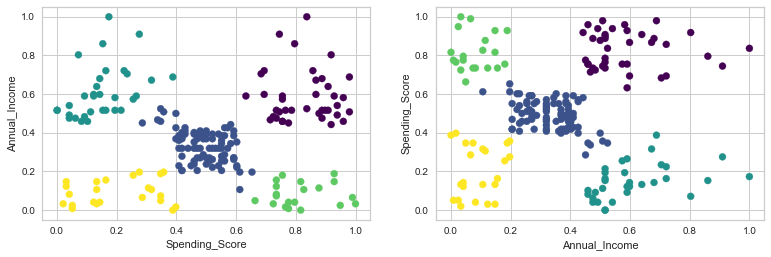

In [122]:
plt.figure(figsize = (20,18))
plot_number = 1
for i in X2:
    for j in X2:
        if j!=i:
            plt.subplot(4,3,plot_number)
            plt.scatter(X2[j], X2[i], c = clusters, cmap = "viridis")
            plt.xlabel(j)
            plt.ylabel(i)
            plot_number += 1

In [123]:
X2["cluster"] = clusters
X2.head()

,Annual_Income,Spending_Score,cluster
0,0.000000,0.387755,4
1,0.000000,0.816327,3
2,0.008197,0.051020,4
3,0.008197,0.775510,3
4,0.016393,0.397959,4


In [124]:
df_den_ann["cluster"] = clusters
df_den_ann.head()

,Annual_Income,Spending_Score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [125]:
df_den_ann.groupby("cluster").mean()

,Annual_Income,Spending_Score
cluster,,
0,86.538462,82.128205
1,55.488372,49.267442
2,89.406250,15.593750
3,24.950000,81.000000
4,26.304348,20.913043


In [127]:
# Hopkins Test
hopkins(X2, X2.shape[0])

0.05153143448098417

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [148]:
hopkins(X1, X1.shape[0])

0.06842586728220457

#### Annual Income and Spending Score- x2

In [149]:
hopkins(X2, X2.shape[0])

0.05255251936800736

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [150]:
df_den_age.groupby("cluster").mean()

,Age,Spending_Score
cluster,,
0,52.578313,35.638554
1,26.382979,34.765957
2,30.942857,77.828571


#### Annual Income and Spending Score- x2

In [151]:
df_den_ann.groupby("cluster").mean()

,Annual_Income,Spending_Score
cluster,,
0,86.538462,82.128205
1,55.488372,49.267442
2,89.406250,15.593750
3,24.950000,81.000000
4,26.304348,20.913043


#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.